# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
banner id:          904366625
verification code:  46fd456af6fa

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2685 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-15 06:11:00,Suburb,108,1.0,2.92,Cash,True
1,1001,2025-11-15 06:58:00,Campus,104,1.0,2.43,Mobile,False
2,1005,2025-11-15 07:00:00,Campus,101,1.0,2.44,Credit,True
3,1006,2025-11-15 07:00:00,Suburb,102,1.0,4.57,Credit,False
4,1004,2025-11-15 07:05:00,Suburb,114,1.0,4.80,Credit,True


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [3]:
# Task 1 - Data quality check

# 1) missing values in each column
missing_counts = sales.isna().sum()
print("Missing values in each column:")
print(missing_counts)
print()

# 2) how many unique product_ids in sales vs catalog
unique_prod_sales = sales["product_id"].nunique()
unique_prod_catalog = products["product_id"].nunique()

print(f"Unique product_ids in sales: {unique_prod_sales}")
print(f"Products in catalog:         {unique_prod_catalog}")
print()

# 3) date range (earliest and latest transaction)
earliest_date = sales["timestamp"].min()
latest_date = sales["timestamp"].max()

print("Date range in sales data:")
print("Earliest transaction:", earliest_date)
print("Latest transaction:  ", latest_date)



Missing values in each column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          7
revenue           3
payment_method    0
loyalty_member    0
dtype: int64

Unique product_ids in sales: 21
Products in catalog:         18

Date range in sales data:
Earliest transaction: 2025-11-15 06:11:00
Latest transaction:   2025-11-28 21:37:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [4]:
# Task 2 - merge sales with products

sales_merged = pd.merge(
    sales,
    products[['product_id', 'name', 'category', 'cost']],
    on='product_id',
    how='left'   
)

sales_merged.head()


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1000,2025-11-15 06:11:00,Suburb,108,1.0,2.92,Cash,True,Chai Latte,Tea,1.2
1,1001,2025-11-15 06:58:00,Campus,104,1.0,2.43,Mobile,False,Americano,Coffee,1.0
2,1005,2025-11-15 07:00:00,Campus,101,1.0,2.44,Credit,True,Espresso,Coffee,1.2
3,1006,2025-11-15 07:00:00,Suburb,102,1.0,4.57,Credit,False,Cappuccino,Coffee,1.8
4,1004,2025-11-15 07:05:00,Suburb,114,1.0,4.80,Credit,True,Cinnamon Roll,Pastry,1.4


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [5]:
# Task 3 - verify the merge

# 1) Compare shapes before and after merge
print("Original sales shape:", sales.shape)
print("Merged shape:", sales_merged.shape)

# 2) Check for missing values in the product columns
prod_missing = sales_merged[['name', 'category', 'cost']].isna().sum()
print("\nMissing values in product columns:")
print(prod_missing)

# 3) Find which product_ids have missing product info
mask_bad = sales_merged[['name', 'category', 'cost']].isna().any(axis=1)

print("\nNumber of rows with missing product info:", mask_bad.sum())

print("\nproduct_ids with missing product info:")
print(sales_merged.loc[mask_bad, 'product_id'].unique())


sales_merged.loc[mask_bad].head()



Original sales shape: (2685, 8)
Merged shape: (2685, 11)

Missing values in product columns:
name        15
category    15
cost        15
dtype: int64

Number of rows with missing product info: 15

product_ids with missing product info:
[200 199 201]


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
552,1565,2025-11-18 13:05:00,Downtown,200,1.0,10.62,Credit,True,NaN,NaN,NaN
577,1578,2025-11-18 14:08:00,Downtown,199,1.0,2.22,Mobile,False,NaN,NaN,NaN
602,1595,2025-11-18 16:49:00,Downtown,200,1.0,2.93,Mobile,True,NaN,NaN,NaN
797,1795,2025-11-19 14:53:00,Campus,200,1.0,3.17,Credit,False,NaN,NaN,NaN
864,1860,2025-11-20 07:20:00,Campus,199,1.0,3.49,Mobile,False,NaN,NaN,NaN


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [6]:
# Task 4: create profit column, then groupby with .agg()

# 1) profit per transaction
sales_merged['profit'] = sales_merged['revenue'] - (
    sales_merged['cost'] * sales_merged['quantity']
)

# drop rows where we can't compute profit
clean = sales_merged.dropna(subset=['revenue', 'cost', 'quantity'])

# 2) summarize by category
profit_by_category = (
    clean
    .groupby('category')
    .agg(
        total_profit=('profit', 'sum'),
        num_transactions=('transaction_id', 'count')
    )
    .sort_values('total_profit', ascending=False)
)

profit_by_category



,total_profit,num_transactions
category,,
Sandwich,4302.57,608
Coffee,2435.39,986
Pastry,1392.36,486
Tea,859.06,580


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [7]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

# keep only rows where profit is defined
profit_data = sales_merged.dropna(subset=['profit'])

profit_cat_loc = (
    profit_data
    .groupby(['category', 'location'])
    .agg(
        total_profit=('profit', 'sum'),
        avg_profit_per_transaction=('profit', 'mean'),
        num_transactions=('transaction_id', 'count')
    )
    .reset_index()   # flat table, no multi-index
    .sort_values('total_profit', ascending=False)
)

profit_cat_loc



,category,location,total_profit,avg_profit_per_transaction,num_transactions
7,Sandwich,Downtown,2630.12,8.043180,327
1,Coffee,Downtown,1145.74,3.088248,371
0,Coffee,Campus,1124.28,2.062899,545
8,Sandwich,Suburb,866.03,6.367868,136
6,Sandwich,Campus,806.42,5.561517,145
3,Pastry,Campus,578.23,2.525022,229
4,Pastry,Downtown,521.89,3.433487,152
11,Tea,Suburb,350.12,1.383874,253
10,Tea,Downtown,294.81,1.865886,158
5,Pastry,Suburb,292.24,2.783238,105


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

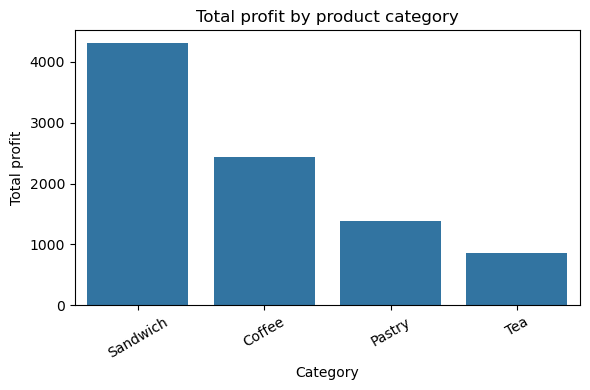

In [8]:
# Task 6: use sns.barplot() with aggregated data

# if profit_by_category already exists from Task 4 we use it,
# otherwise we build it again quickly
try:
    plot_data = profit_by_category.reset_index()
except NameError:
    temp = sales_merged.dropna(subset=['revenue', 'cost', 'quantity'])
    temp['profit'] = temp['revenue'] - temp['cost'] * temp['quantity']
    plot_data = (
        temp.groupby('category')
            .agg(total_profit=('profit', 'sum'))
            .sort_values('total_profit', ascending=False)
            .reset_index()
    )

plt.figure(figsize=(6, 4))
sns.barplot(data=plot_data, x='category', y='total_profit')
plt.title("Total profit by product category")
plt.xlabel("Category")
plt.ylabel("Total profit")
plt.xticks(rotation=30)
plt.tight_layout()



## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers


1. What could have gone wrong had you not checked the merge in Task 3?

The problem is that if I had been able to skip doing the merge checks, I could have easily trusted results that were actually wrong. In my data there are 21 product_ids in sales but only 18 in the catalog, and 15 rows where product columns are missing for ids 199, 200, and 201. Blind to that fact, I would then calculate the profit based on incomplete cost information and treat those rows as real products. That would distort the totals and any decisions based on them.

2. How did aggregating at different levels-by category, then by category and location-change what I could learn?
Task 4 simply aggregated all items by category to yield a big-picture view: sandwiches are the most profitable, at about 4,302.57, followed by coffee, pastry, and tea. This is useful in determining which product lines are key for the business as a whole. In contrast, Task 5 grouped both by category and location. I was able, for instance, to see that sandwiches at the Downtown store alone bring in about 2,630.12 of profit, while sandwiches at Campus and Suburb are significantly smaller. So the second aggregation shows where the profit is coming from, rather than what is selling.

3. Patterns and insights from the analysis
A few patterns jump out: the sandwich category is overall the most profitable at 4,302.57, despite fewer transactions than coffee, which suggests higher profit per sale. Coffee has the most transactions but a lower total profit than sandwiches, so its margins seem thinner. Tea is clearly the weakest category, with the lowest total profit of 859.06. When I split by location, Downtown looks like it's the strongest store: Downtown sandwiches come in at 2,630.12, and Downtown coffee is at 1,145.74, making both categories top performers. Campus and Suburb are less strong, especially on tea and pastry.

 
4. Recommendation for the coffee shop owner
If I had to pick one main action, I would focus on growing sandwich sales at the Downtown location because that combination is already the profit engine of the business. Overall, sandwiches generate about 4,302.57 in profit, and Downtown sandwiches alone account for roughly 2,630.12 of that, with an average profit of about 8.04 per transaction. I'd suggest doubling down there: make sure inventory and staffing are strong at busy times, promote sandwich-and-drink combos, and consider highlighting the most popular sandwiches on the menu. Follow-up analysis should include investigating time of day and day of week patterns, and looking at loyalty members versus non-members, to see when and for whom these promotions would have the greatest impact.


## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [9]:
# Bonus: Time-based analysis – profit by day of week

# keep rows where profit is defined, and make a copy
time_data = sales_merged.dropna(subset=['profit']).copy()

# add day-of-week column
time_data['day_of_week'] = time_data['timestamp'].dt.day_name()

# aggregate by day of week
dow_profit = (
    time_data
    .groupby('day_of_week')
    .agg(
        total_profit=('profit', 'sum'),
        num_transactions=('transaction_id', 'count'),
        avg_profit=('profit', 'mean')
    )
    .reset_index()
)

# order days in calendar order
day_order = ['Monday', 'Tuesday', 'Wednesday',
             'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_profit['day_of_week'] = pd.Categorical(
    dow_profit['day_of_week'],
    categories=day_order,
    ordered=True
)

dow_profit = dow_profit.sort_values('day_of_week')
dow_profit


,day_of_week,total_profit,num_transactions,avg_profit
1,Monday,1438.63,421,3.417173
5,Tuesday,1429.88,419,3.412601
6,Wednesday,1421.03,419,3.391480
4,Thursday,1437.55,419,3.430907
0,Friday,1887.44,553,3.413092
2,Saturday,668.67,213,3.139296
3,Sunday,706.18,216,3.269352


### Your Findings

***Question: Which day of the week is most profitable?***

I grouped the transactions by day of week and calculated total profit,
number of transactions, and average profit per transaction. Friday stands
out as the most profitable day with total profit of about 1887 dollars
and 553 transactions. Saturday and Sunday are the weakest days, with
total profit around 669 and 706 dollars and about 213–216 transactions.
This suggests that weekdays, especially Friday, are the key revenue
drivers for the shop.


## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.